<a href="https://colab.research.google.com/github/George090872/Computer-Vision/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Image Processing in Python

#### Multi-dimensional arrays
We will now read a color image from disk:

Which component is which? Convert the image to grayscale using the formula
gray = 0.299R+0.587G+0.114B, and plot it where the color image now is. Compare the
grey-scale image with the RGB components. (This is best done in a function)

In [ ]:
def convert_to_grayscale_and_compare(image):
  #Converts an image to grayscale and compares it with RGB components.
  # Convert the image to grayscale using the formula
  grayscale_image = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]

  # Plot the grayscale image and RGB components for comparison
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 5, 1)
  plt.imshow(image)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 5, 2)
  plt.imshow(grayscale_image, cmap='gray')
  plt.title('Grayscale Image')
  plt.axis('off')

  plt.subplot(1, 5, 3)
  plt.imshow(image[:, :, 0], cmap='Reds')  # Red channel
  plt.title('Red Channel')
  plt.axis('off')

  plt.subplot(1, 5, 4)
  plt.imshow(image[:, :, 1], cmap='Greens')  # Green channel
  plt.title('Green Channel')
  plt.axis('off')

  plt.subplot(1, 5, 5)
  plt.imshow(image[:, :, 2], cmap='Blues')  # Blue channel
  plt.title('Blue Channel')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

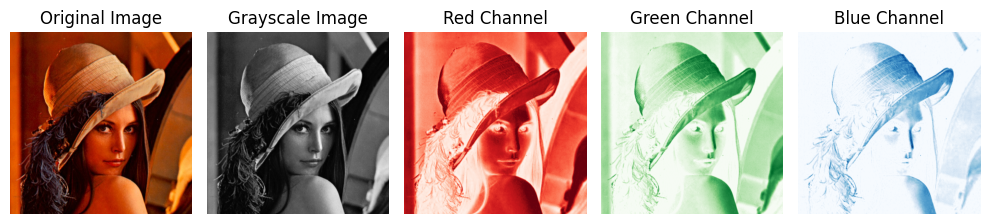

In [ ]:
# Call the function to convert the image to grayscale
convert_to_grayscale_and_compare(image)

Explanation: The function convert_to_grayscale_and_compare takes an image as input and converts it to grayscale using a weighted average of its red, green, and blue channels. It then displays the original image alongside the grayscale version and individual red, green, and blue channels as separate subplots for comparison. This visualization helps to understand how the grayscale image is created from the color components and how each channel contributes to the overall image. The subplots are arranged in a single row with appropriate titles and axes turned off for clarity.

 Write a code to create a salt and pepper noise. Then use median filtering with window size 7x7 to remove this noise. Apply noise on Lena image, then show the result before and after applying median filtering.

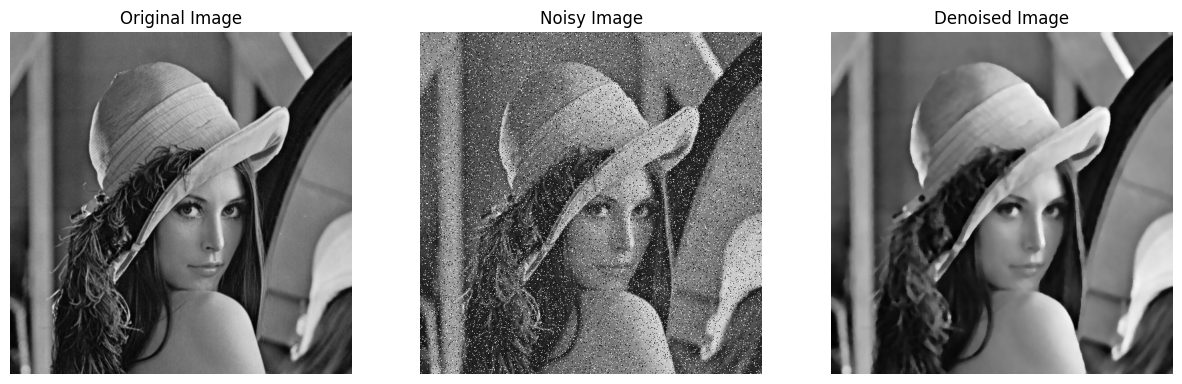

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

# Load the Lena image in grayscale
image = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)

# Create salt and pepper noise using random.choice
def salt_and_pepper(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = prob * 255
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random() * 255
            if rdn < thres:
                output[i][j] = 0
            elif rdn > 255 - thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noisy_image = salt_and_pepper(image, 0.05)  # 5% noise probability

# Apply median filtering to remove noise
denoised_image = cv2.medianBlur(noisy_image, 7)  # 7x7 kernel size

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

Explanation: This script demonstrates adding "salt-and-pepper" noise to an image and removing it using median filtering. The Lena image is loaded in grayscale, and noise is artificially introduced by randomly setting some pixels to either black (0) or white (255) with a 5% probability. This mimics a common type of image noise. The noisy image is then denoised using a median filter, which replaces each pixel's value with the median value of its neighbors in a (7x7) kernel. The original, noisy, and denoised images are displayed for comparison using Matplotlib.

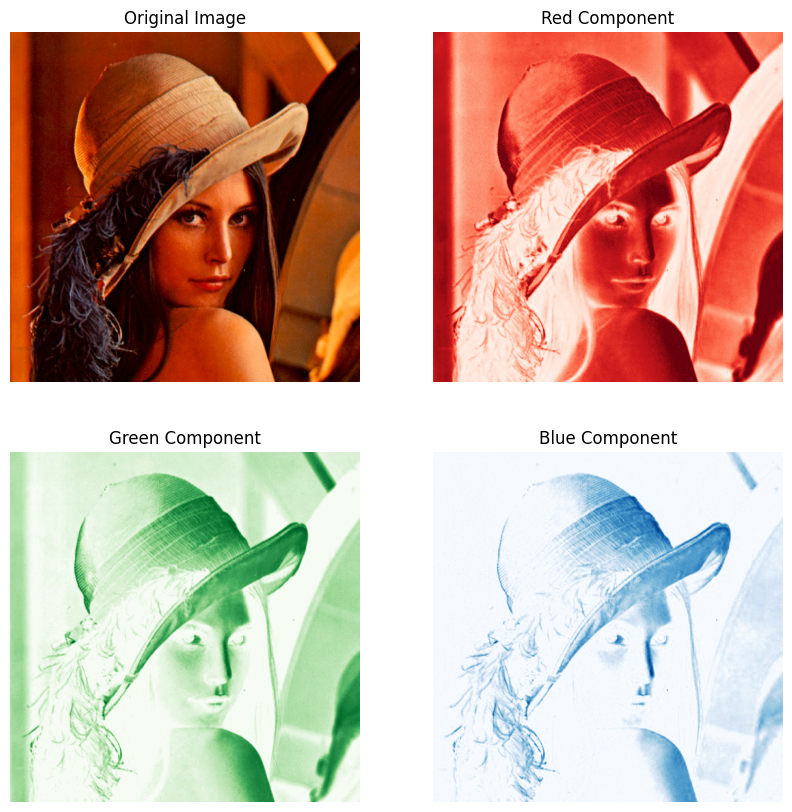

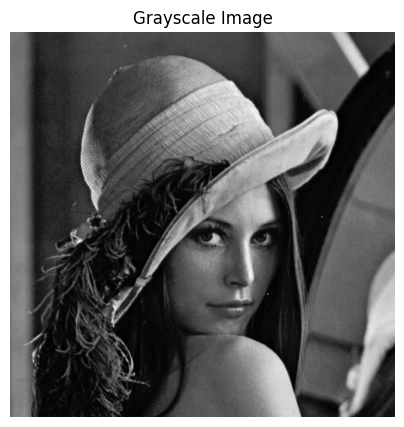

In [ ]:
Ex:1
image = cv2.imread('lenna-RGB.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
gray = 0.299 * R + 0.587 * G + 0.114 * B

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(image), plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(R, cmap='Reds'), plt.title('Red Component'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(G, cmap='Greens'), plt.title('Green Component'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(B, cmap='Blues'), plt.title('Blue Component'), plt.axis('off')
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image'), plt.axis('off')
plt.show()